In [345]:
import nltk
import requests
import pandas
from bs4 import BeautifulSoup
from matplotlib import pyplot
from wordcloud import WordCloud
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

from kryptone.utils.text import (clean_text, drop_null, normalize_spaces,
                                 remove_punctuation)


In [330]:
URL = 'http://gency313.fr/'


Ge the website's content and eliminate tags such as scripts to get a clean perfect text

In [331]:
response = requests.get(URL)


In [332]:
soup = BeautifulSoup(response.content, 'html.parser')
removed_scripts = [tag.extract() for tag in soup.find_all('script')]


In [333]:
tokenizer = nltk.tokenize.LineTokenizer()
tokens = tokenizer.tokenize(soup.text)

text = ' '.join(tokens)
text = remove_punctuation(text)

tokenizer = nltk.tokenize.SpaceTokenizer()
tokens = tokenizer.tokenize(text)
tokens = list((token for token in tokens if token != ''))


In [334]:
tokens = list((token.lower() for token in tokens))


Longest word in french is not more than 30 characters. So remoeve words that are longer than this

In [335]:
tokens = list(filter(lambda x: len(x) <= 30, tokens))


In [336]:
clean_original_text = ' '.join(tokens)
clean_original_text


'accélérateur de croissance pour votre entreprise gency313 gency313 accueil apps expertise à propos débloquez votre croissance nous vous aidons à booster votre trafic à améliorer votre taux de conversion et à atteindre vos objectifs de croissance grâce à notre agence spécialisée en growth marketing nous contacter agence growth marketing optimiser votre croissance avec un stratégie multicanal perdez moins de temps à optimiser votre site web optimisez le seo de votre site web notamment avec la maximisation de la recherche google à travers le copywriting avec le perfectionnement de vos mots clés faites un audit complet et augmentez considérablement votre nombre de prospects ainsi que vos chances daugmenter vos taux de conversion optimiser mon seo votre entreprise travail pour vous tout simplement des process automatisés qui simplifient votre vie et celle et de vos employés vous consacrerez ainsi plus de temps à satisfaire les désirs de vos clients automatiser mon entreprise consacrez plus

In [337]:
with open('data/stop_words_french.txt', mode='r', encoding='utf-8') as f:
    stop_words = f.read().split('\n')
clean_tokens = list((token for token in tokens if token not in stop_words))


In [338]:
' '.join(clean_tokens)


'accélérateur croissance entreprise gency313 gency313 accueil apps expertise propos débloquez croissance aidons booster trafic améliorer taux conversion atteindre objectifs croissance grâce agence spécialisée growth marketing contacter agence growth marketing optimiser croissance stratégie multicanal perdez temps optimiser site web optimisez seo site web notamment maximisation recherche google travers copywriting perfectionnement mots clés audit complet augmentez considérablement nombre prospects chances daugmenter taux conversion optimiser seo entreprise travail simplement process automatisés simplifient vie employés consacrerez temps satisfaire désirs clients automatiser entreprise consacrez temps coeur métier déléguant partie activités dacquisition client growth marketing pourrez trouver temps supplémentaire prendre soin clients obtenir clients présence numérique accrue croissance améliorée obtenez dopportunités vente marketing renforçant crédibilité visàvis public améliorant consid

In [394]:
frequency = nltk.FreqDist(clean_tokens)
frequency_values = list(frequency.items())
sorted_frequency = sorted(
    frequency_values,
    key=lambda x: x[1],
    reverse=True
)[0:10]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

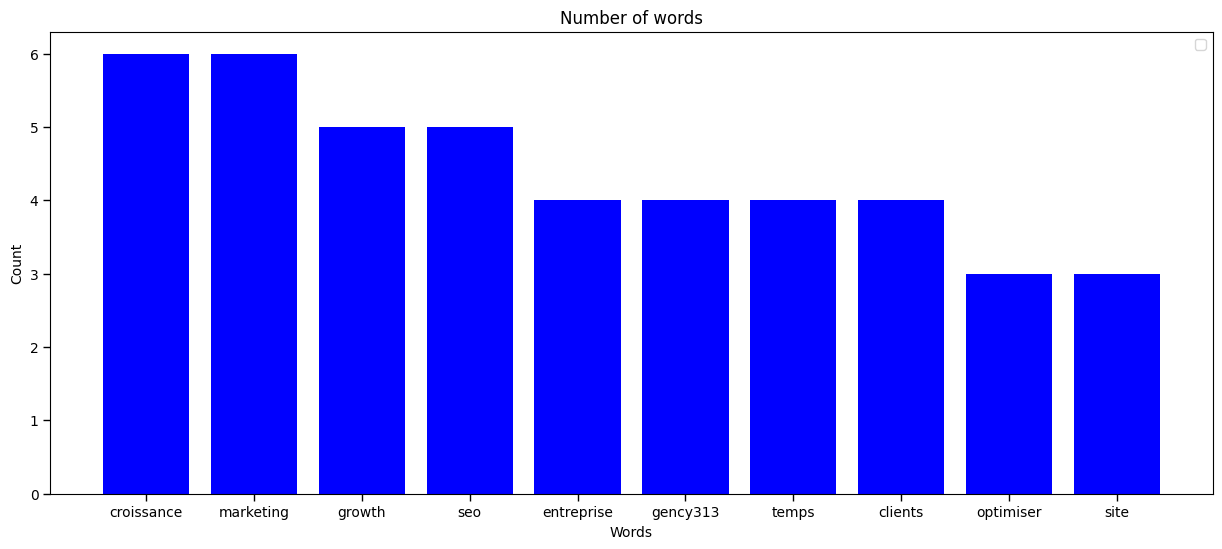

In [343]:
import matplotlib


x = [x[0] for x in sorted_frequency]
y = [x[1] for x in sorted_frequency]

fig = pyplot.figure()
fig, axes = pyplot.subplots(figsize=[15, 6])
axes.set_xlabel('Words')
axes.set_ylabel('Count')
axes.set_title('Number of words')
axes.tick_params(which='major', width=1.00, length=5)
# axes.text(20, 35, 'Some text')
# axes.annotate('Something', xy=[30, 40], xytext=[14, 31], arrowprops={
#               'facecolor': 'black', 'shrink': 0.05})
# axes.set_xticks([0, 30, 70, 100])
axes.legend()
# axes.plot(x, y, 'o', label='words')
axes.bar(x, y, color='b')
# fig.savefig('word_distribution')


In [341]:
stemmer = SnowballStemmer('french')
stemmed_words = [stemmer.stem(word=word) for word in clean_tokens]


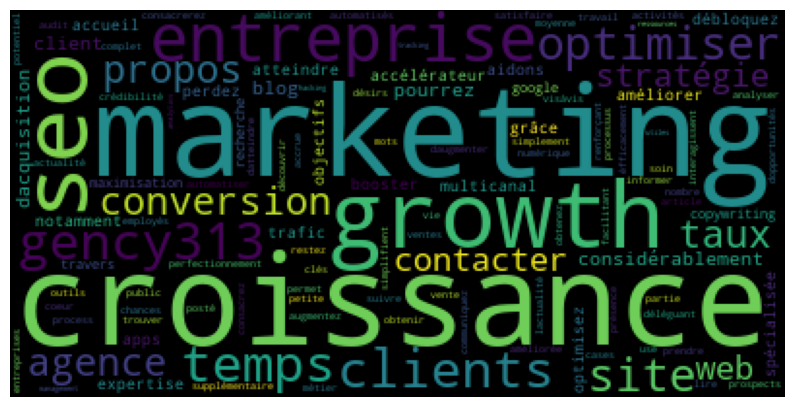

In [344]:
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequency)

fig = pyplot.figure(figsize=[10, 10])
pyplot.imshow(wordcloud)
pyplot.axis('off')
pyplot.show()
# fig.savefig('word_frequency')


Other additional SEO analysis

In [359]:
data = {
    'words': list(frequency.keys()),
    'count': list(frequency.values())
}
df = pandas.DataFrame(data)
df = df.sort_values('count', ascending=False)
df.head()


,words,count
1,croissance,6
21,marketing,6
31,seo,5
20,growth,5
2,entreprise,4


In [362]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


In [368]:
X_train, X_test, y_train, y_test = train_test_split(df[['words', 'count']], df['count'])


In [369]:
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)


(2, 2) (2, 2)


In [373]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


In [372]:
model = MultinomialNB()


In [ ]:
model.fit(train_vectors, y_train)


In [ ]:
prediction = model.predict(test_vectors)
print(accuracy_score(y_test, prediction))


In [390]:
from functools import lru_cache

@lru_cache(maxsize=200)
def test():
    print('called')
    return [x for x in range(100)]

print(test())


called
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
